In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Conect ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/example/airline_tweets.csv')

In [ ]:
df.head()

,Unnamed: 0,airline,airline_sentiment,text,text_tokens,text_tokens_fdist,text_tokens_WSW,text_normalized,text_lemmatized,text_stemmed,final_text
0,0,Virgin America,1,what said,"['what', 'said']",<FreqDist with 2 samples and 2 outcomes>,['said'],['said'],['said'],['said'],['said']
1,1,Virgin America,2,plus youve added commercials to the experience...,"['plus', 'youve', 'added', 'commercials', 'to'...",<FreqDist with 8 samples and 8 outcomes>,"['plus', 'youve', 'added', 'commercials', 'exp...","['plus', 'youve', 'added', 'commercials', 'exp...","['plus', 'youve', 'added', 'commercial', 'expe...","['plu', 'youv', 'ad', 'commerci', 'experi', 't...","['plu', 'youv', 'ad', 'commerci', 'experi', 't..."
2,2,Virgin America,1,didnt today must mean need to take another trip,"['didnt', 'today', 'must', 'mean', 'need', 'to...",<FreqDist with 9 samples and 9 outcomes>,"['didnt', 'today', 'must', 'mean', 'need', 'ta...","['didnt', 'today', 'must', 'mean', 'need', 'ta...","['didnt', 'today', 'must', 'mean', 'need', 'ta...","['didnt', 'today', 'must', 'mean', 'need', 'ta...","['didnt', 'today', 'must', 'mean', 'need', 'ta..."
3,3,Virgin America,0,its really aggressive to blast obnoxious enter...,"['its', 'really', 'aggressive', 'to', 'blast',...",<FreqDist with 16 samples and 16 outcomes>,"['really', 'aggressive', 'blast', 'obnoxious',...","['really', 'aggressive', 'blast', 'obnoxious',...","['really', 'aggressive', 'blast', 'obnoxious',...","['realli', 'aggress', 'blast', 'obnoxi', 'ente...","['realli', 'aggress', 'blast', 'obnoxi', 'ente..."
4,4,Virgin America,0,and its really big bad thing about it,"['and', 'its', 'really', 'big', 'bad', 'thing'...",<FreqDist with 8 samples and 8 outcomes>,"['really', 'big', 'bad', 'thing']","['really', 'big', 'bad', 'thing']","['really', 'big', 'bad', 'thing']","['realli', 'big', 'bad', 'thing']","['realli', 'big', 'bad', 'thing']"


In [ ]:
TWEET_DATA = df [['airline_sentiment','text_stemmed']]
TWEET_DATA.head()
# Sentimen “positive” menjadi nomor 2, sentiment “neutral” menjadi nomor 1, dan sentimen “negative” menjadi nomor 0.

,airline_sentiment,text_stemmed
0,1,['said']
1,2,"['plu', 'youv', 'ad', 'commerci', 'experi', 't..."
2,1,"['didnt', 'today', 'must', 'mean', 'need', 'ta..."
3,0,"['realli', 'aggress', 'blast', 'obnoxi', 'ente..."
4,0,"['realli', 'big', 'bad', 'thing']"


In [ ]:
# Konversi string ke dalam list
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

TWEET_DATA["tweet_list"] = TWEET_DATA["text_stemmed"].apply(convert_text_list)


print(TWEET_DATA["tweet_list"][126])

print("\ntype : ", type(TWEET_DATA["tweet_list"][126]))

['need', 'chang', 'flight', 'that', 'schedul', 'hour', 'min', 'wait', 'time', 'phone', 'im', 'call', 'intern', 'help']

type :  <class 'list'>


<ipython-input-6-e5e03393d22a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TWEET_DATA["tweet_list"] = TWEET_DATA["text_stemmed"].apply(convert_text_list)


## Menghitung Term Frequency (TF)

In [ ]:
def calc_TF(document):
    # Menghitung berapa kali kata tersebut muncul dalam ulasan
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Menghitung tf untuk setiap kata
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

TWEET_DATA["TF_dict"] = TWEET_DATA['tweet_list'].apply(calc_TF)

TWEET_DATA["TF_dict"].head()

<ipython-input-7-7ddf807f0b00>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TWEET_DATA["TF_dict"] = TWEET_DATA['tweet_list'].apply(calc_TF)


0                                        {'said': 1.0}
1    {'plu': 0.16666666666666666, 'youv': 0.1666666...
2    {'didnt': 0.125, 'today': 0.125, 'must': 0.125...
3    {'realli': 0.1, 'aggress': 0.1, 'blast': 0.1, ...
4    {'realli': 0.25, 'big': 0.25, 'bad': 0.25, 'th...
Name: TF_dict, dtype: object

In [ ]:
# Cek hasil TF index ke 126
index = 126

print('%20s' % "term", "\t", "TF\n")
for key in TWEET_DATA["TF_dict"][index]:
    print('%20s' % key, "\t", TWEET_DATA["TF_dict"][index][key])

                term 	 TF

                need 	 0.07142857142857142
               chang 	 0.07142857142857142
              flight 	 0.07142857142857142
                that 	 0.07142857142857142
             schedul 	 0.07142857142857142
                hour 	 0.07142857142857142
                 min 	 0.07142857142857142
                wait 	 0.07142857142857142
                time 	 0.07142857142857142
               phone 	 0.07142857142857142
                  im 	 0.07142857142857142
                call 	 0.07142857142857142
              intern 	 0.07142857142857142
                help 	 0.07142857142857142


## Menghitung Inverse Document Frequency (IDF)

In [ ]:
def calc_DF(tfDict):
    count_DF = {}
    # Jalankan melalui kamus tf setiap dokumen dan tingkatkan pasangan (term, doc) countDict
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(TWEET_DATA["TF_dict"])
DF

{'said': 174,
 'plu': 59,
 'youv': 58,
 'ad': 47,
 'commerci': 17,
 'experi': 210,
 'tacki': 1,
 'didnt': 210,
 'today': 412,
 'must': 35,
 'mean': 95,
 'need': 661,
 'take': 368,
 'anoth': 265,
 'trip': 222,
 'realli': 294,
 'aggress': 3,
 'blast': 6,
 'obnoxi': 2,
 'entertain': 32,
 'guest': 8,
 'face': 21,
 'amp': 581,
 'littl': 67,
 'recours': 5,
 'big': 71,
 'bad': 177,
 'thing': 128,
 'serious': 78,
 'would': 524,
 'pay': 184,
 'flight': 3881,
 'seat': 453,
 'play': 26,
 'fli': 667,
 'va': 11,
 'ye': 234,
 'nearli': 14,
 'everi': 111,
 'time': 895,
 'vx': 12,
 'ear': 4,
 'worm': 1,
 'wont': 182,
 'go': 638,
 'away': 72,
 'miss': 395,
 'prime': 4,
 'opportun': 13,
 'men': 3,
 'without': 106,
 'hat': 5,
 'parodi': 1,
 'well': 208,
 'didntbut': 1,
 'amaz': 99,
 'arriv': 184,
 'hour': 1087,
 'earli': 91,
 'your': 169,
 'good': 298,
 'know': 384,
 'suicid': 6,
 'second': 60,
 'lead': 15,
 'caus': 77,
 'death': 14,
 'among': 11,
 'teen': 7,
 'lt': 20,
 'pretti': 42,
 'graphic': 2,
 'mu

In [ ]:
n_document = len(TWEET_DATA)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict

# Menyimpan kamus IDF
IDF = calc_IDF(n_document, DF)

In [ ]:
# Hitung TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    # Untuk setiap kata dalam review, kalikan tf dan idfnya
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

# Simpan TF-IDF
TWEET_DATA["TF-IDF_dict"] = TWEET_DATA["TF_dict"].apply(calc_TF_IDF)

<ipython-input-11-3a7520f39550>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TWEET_DATA["TF-IDF_dict"] = TWEET_DATA["TF_dict"].apply(calc_TF_IDF)


In [ ]:
# Cek hasil TF-IDF
index = 126

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in TWEET_DATA["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", TWEET_DATA["TF_dict"][index][key] ,"\t" , TWEET_DATA["TF-IDF_dict"][index][key])

                term 	         TF 	              TF-IDF

                need 	 0.07142857142857142 	 0.22116051654130672
               chang 	 0.07142857142857142 	 0.25082711374426514
              flight 	 0.07142857142857142 	 0.09481478741331048
                that 	 0.07142857142857142 	 0.2960553868463566
             schedul 	 0.07142857142857142 	 0.3583429863579942
                hour 	 0.07142857142857142 	 0.18567259714995815
                 min 	 0.07142857142857142 	 0.2666842595022745
                wait 	 0.07142857142857142 	 0.21646300868705212
                time 	 0.07142857142857142 	 0.19954088389574087
               phone 	 0.07142857142857142 	 0.25017627943346116
                  im 	 0.07142857142857142 	 0.21417630381234753
                call 	 0.07142857142857142 	 0.21830510832154598
              intern 	 0.07142857142857142 	 0.3847728691517383
                help 	 0.07142857142857142 	 0.19292169052629543


In [ ]:
# Urutkan menurun berdasarkan nilai untuk kamus DF
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Buat daftar kata-kata unik dari kamus yang diurutkan `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # Untuk setiap kata unik, jika ada dalam ulasan, simpan nilai TF-IDF-nya
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

TWEET_DATA["TF_IDF_Vec"] = TWEET_DATA["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(TWEET_DATA["TF_IDF_Vec"][0])

print("\nmatrix size : ", len(TWEET_DATA["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

matrix size :  50


<ipython-input-13-939d3f36435d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TWEET_DATA["TF_IDF_Vec"] = TWEET_DATA["TF-IDF_dict"].apply(calc_TF_IDF_Vec)


In [ ]:
# Convert Series to List
TF_IDF_Vec_List = np.array(TWEET_DATA["TF_IDF_Vec"].to_list())

# Jumlahkan vektor elemen pada sumbu=0
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))

ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
1,thank,903.539649
0,flight,695.288764
2,get,395.332139
3,hour,331.804564
5,help,320.304976
7,delay,307.985205
6,servic,303.299550
8,custom,288.637199
9,time,283.076409
4,cancel,269.765387


Top 10 words in negative sentiment tweets: [('flight', 3555), ('get', 1193), ('hour', 1097), ('cancel', 913), ('delay', 882), ('custom', 773), ('servic', 767), ('time', 743), ('help', 706), ('call', 683)]
Top 10 words in neutral sentiment tweets: [('thank', 224), ('need', 184), ('pleas', 178), ('fli', 151), ('im', 136), ('go', 129), ('dm', 123), ('book', 122), ('would', 122), ('ticket', 113)]
Top 10 words in positive sentiment tweets: [('great', 233), ('love', 157), ('guy', 123), ('good', 111), ('much', 109), ('airlin', 105), ('best', 104), ('got', 101), ('awesom', 99), ('u', 91)]

Top 10 words in negative sentiment tweets:
flight: 3555
get: 1193
hour: 1097
cancel: 913
delay: 882
custom: 773
servic: 767
time: 743
help: 706
call: 683

Top 10 words in neutral sentiment tweets:
thank: 224
need: 184
pleas: 178
fli: 151
im: 136
go: 129
dm: 123
book: 122
would: 122
ticket: 113

Top 10 words in positive sentiment tweets:
great: 233
love: 157
guy: 123
good: 111
much: 109
airlin: 105
best: 104


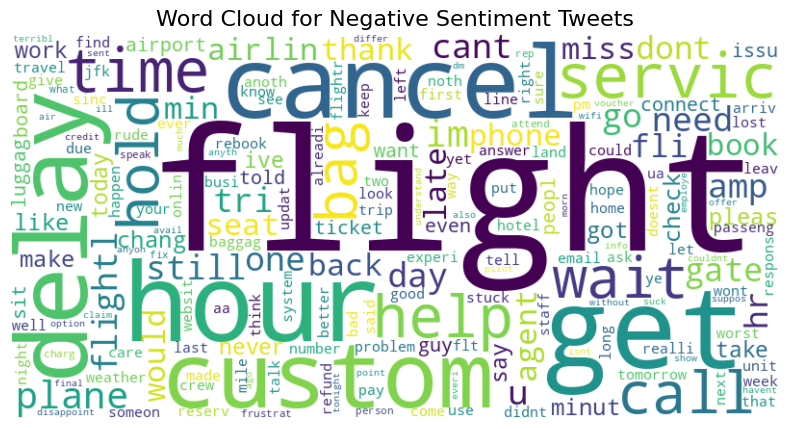

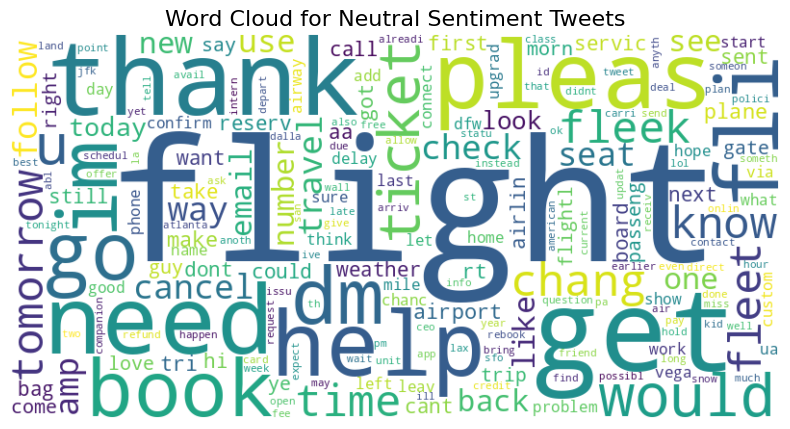

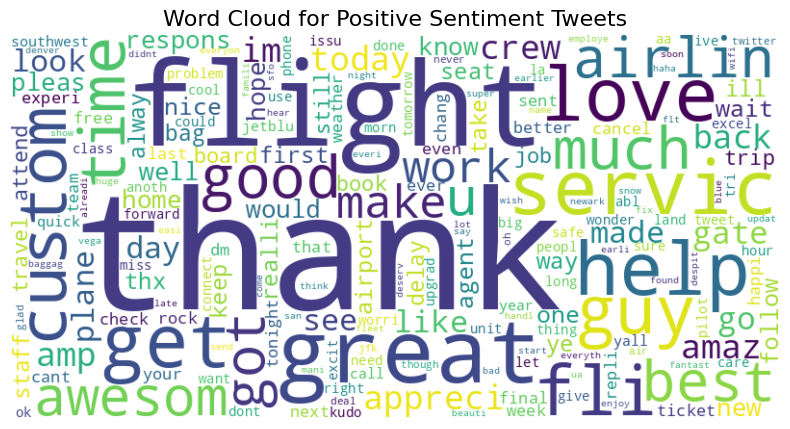

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

# Fungsi untuk menghitung kata-kata paling sering muncul dalam teks berdasarkan sentimen
def get_word_frequencies(df, sentiment_value):
    # Filter dataframe berdasarkan sentimen
    filtered_df = df[df['airline_sentiment'] == sentiment_value]
    # Gabungkan semua teks
    all_text = ' '.join(filtered_df['text_stemmed'])
    # Hapus tanda baca
    all_text = all_text.translate(str.maketrans('', '', string.punctuation))
    # Pisahkan kata-kata
    words = all_text.split()
    # Hitung frekuensi kata
    word_freq = Counter(words)
    return word_freq

# Fungsi untuk mendapatkan 10 kata teratas tanpa duplikat beserta frekuensinya
def get_unique_top_words_with_freq(freq, existing_words):
    unique_top_words = []
    for word, count in freq.most_common():
        if word not in existing_words:
            unique_top_words.append((word, count))
            existing_words.add(word)
        if len(unique_top_words) == 10:
            break
    return unique_top_words

# Fungsi untuk menampilkan frekuensi kata dalam format yang rapi
def display_top_words(top_words, sentiment_label):
    print(f"\nTop 10 words in {sentiment_label} sentiment tweets:")
    for word, count in top_words:
        print(f"{word}: {count}")

# Fungsi untuk menghasilkan word cloud dari frekuensi kata
def generate_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Dapatkan frekuensi kata untuk setiap sentimen
freq_negative = get_word_frequencies(TWEET_DATA, 0)
freq_neutral = get_word_frequencies(TWEET_DATA, 1)
freq_positive = get_word_frequencies(TWEET_DATA, 2)

# Gabungkan semua kata dalam satu set untuk memeriksa duplikat
all_words = set(freq_negative.keys()).union(set(freq_neutral.keys())).union(set(freq_positive.keys()))

# Buat kamus untuk menyimpan 10 kata teratas tanpa duplikat
top_words = {
    'negative': [],
    'neutral': [],
    'positive': []
}

# Dapatkan 10 kata teratas tanpa duplikat untuk setiap sentimen beserta frekuensinya
existing_words = set()
top_words['negative'] = get_unique_top_words_with_freq(freq_negative, existing_words)
top_words['neutral'] = get_unique_top_words_with_freq(freq_neutral, existing_words)
top_words['positive'] = get_unique_top_words_with_freq(freq_positive, existing_words)

# Tampilkan hasil
print("Top 10 words in negative sentiment tweets:", top_words['negative'])
print("Top 10 words in neutral sentiment tweets:", top_words['neutral'])
print("Top 10 words in positive sentiment tweets:", top_words['positive'])

# Tampilkan hasil dengan jumlah kemunculan
display_top_words(top_words['negative'], 'negative')
display_top_words(top_words['neutral'], 'neutral')
display_top_words(top_words['positive'], 'positive')

# Ubah format frekuensi kata menjadi dictionary untuk word cloud
word_freq_negative = dict(freq_negative)
word_freq_neutral = dict(freq_neutral)
word_freq_positive = dict(freq_positive)

# Hasilkan word cloud untuk setiap sentimen
generate_wordcloud(word_freq_negative, 'Word Cloud for Negative Sentiment Tweets')
generate_wordcloud(word_freq_neutral, 'Word Cloud for Neutral Sentiment Tweets')
generate_wordcloud(word_freq_positive, 'Word Cloud for Positive Sentiment Tweets')


## Membuat Model

In [ ]:
X = df['text']
y = df['airline_sentiment']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [ ]:
# Penanganan ketidakseimbangan menggunakan SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.25,random_state=3)

In [ ]:
# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics

In [ ]:
# Menggunakan Accuracy Randome Forest Score
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)

# Menggunakan Accuracy XGBClassifier Score
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_prediction =  xgb.predict(X_test)

# Menggunakan Accuracy Gradient Boosting Score
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_prediction =  gbc.predict(X_test)

# Menggunakan Accuracy Support Vector Machine Score
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)

# Menggunakan Accuracy Naive Bayes Score
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)

# Menggunakan Accuracy Decision Tree Classifier Score
des_tree_classifier = DecisionTreeClassifier()
des_tree_classifier.fit(X_train,y_train)
des_tree_classifier_prediction=des_tree_classifier.predict(X_test)

print("Hasil Accuracy Random Forest Score : ", accuracy_score(random_forest_classifier_prediction,y_test))
print("Hasil Accuracy XGBClassifier Score : ", accuracy_score(xgb_prediction,y_test))
print("Hasil Accuracy Gradient Boosting Score : ", accuracy_score(gbc_prediction,y_test))
print("Hasil Accuracy Support Vector Machine Score : ", accuracy_score(svm_prediction,y_test))
print("Hasil Accuracy Accuracy Naive Bayes Score : ", accuracy_score(nb_prediction,y_test))
print("Hasil Accuracy Decision Tree Classifier Score : ", accuracy_score(des_tree_classifier_prediction,y_test))

Hasil Accuracy Random Forest Score :  0.8945380592678676
Hasil Accuracy XGBClassifier Score :  0.8506682161533992
Hasil Accuracy Gradient Boosting Score :  0.780796048808832
Hasil Accuracy Support Vector Machine Score :  0.9083381754793725
Hasil Accuracy Accuracy Naive Bayes Score :  0.8448576409064498
Hasil Accuracy Decision Tree Classifier Score :  0.7990993608367228


Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      2343
           1       0.94      0.86      0.89      2264
           2       0.96      0.92      0.94      2277

    accuracy                           0.91      6884
   macro avg       0.91      0.91      0.91      6884
weighted avg       0.91      0.91      0.91      6884



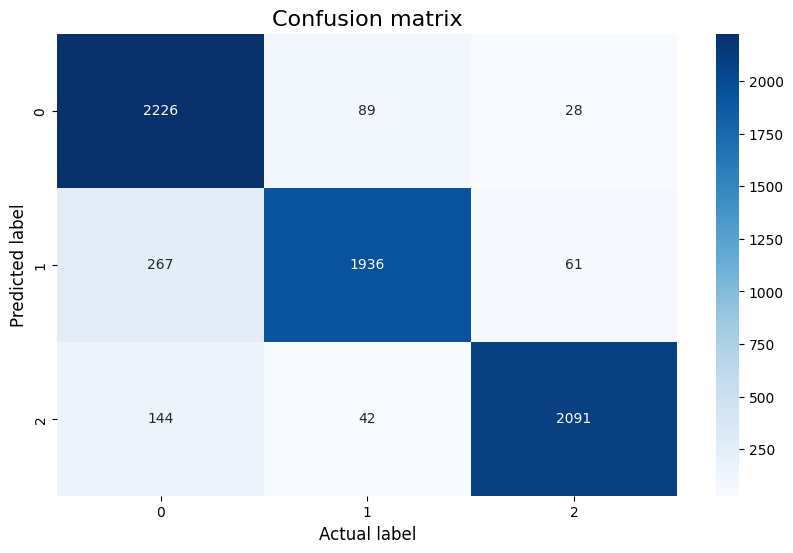

In [ ]:
# Visualisasi kinerja model menggunakan svm_prediction karena menghasilkan tinggat akurasi yang baik daripada yang lain
import matplotlib.pyplot as plt
import seaborn as sns
cr = classification_report(y_test, svm_prediction)
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,svm_prediction)


# plot confusion matrix
plt.figure(figsize=(10,6))
# sentiment_classes = ['Negative', 'Neutral', 'Positive']
airline_sentiment = [0, 1, 2]
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
            xticklabels=airline_sentiment,
            yticklabels=airline_sentiment)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()